In [4]:
import pandas as pd

#data = {
#    't': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34],
#    'Y(t)': [
#          100,
#          142.77,
#          124.92,
#         115.21,
#          113.21,
#          110.01,
#          105.08,
#          100.8,
#          104.57,
#          105.29,
#          103.03,
#          100.5,
#          101.81,
#          103.03,
#          101,
#          143.81,
#          123.27,
#          116,
#          107.3,
#          105.6,
#          103.9,
#          103.94,
#          105.4,
#          104.2,
#          105.4,
#          107.1,
#          105.3,
#          101.1,
#          104.1,
#          105.5,
#          103.4,
#          101.2,
#          104.26,
#          105.2,
#],
#}
#data_frame = pd.DataFrame(data)
#data_frame

data = pd.read_csv('/content/data.csv', delimiter = ';')
data['Экспорт'] = data['Экспорт'].str.replace(',', '.').astype(float)
data.index_col = 'Область'
data

,Год,Область,Экспорт
0,2000,Курганская область,113.2
1,2000,Свердловская область,284.0
2,2000,Тюменская область,1197.9
3,2000,Челябинская область,213.0
4,2001,Курганская область,75.0
...,...,...,...
83,2020,Челябинская область,1972.7
84,2021,Курганская область,81.0
85,2021,Свердловская область,1671.2
86,2021,Тюменская область,518.8


In [5]:
unique_regions = data['Область'].unique()
region_wise_data = {region: data[data['Область'] == region] for region in unique_regions}

data = region_wise_data['Челябинская область']
data = data.drop('Область', axis=1)

data.rename(columns={
    'Год': 't',
    'Экспорт': 'Y(t)',
}, inplace=True)
data_frame = data
data

,t,Y(t)
3,2000,213.00
7,2001,271.80
11,2002,259.50
15,2003,436.30
19,2004,660.00
23,2005,941.50
27,2006,1134.50
31,2007,1828.40
35,2008,2228.30
39,2009,1114.80


## Сглаживание временных рядов

Сглаживание временного ряда, т.е. замена фактических уровней расчетными
значениями, имеющими меньшую колеблемость, чем исходные данные,
является простым методом выявления тенденции развития

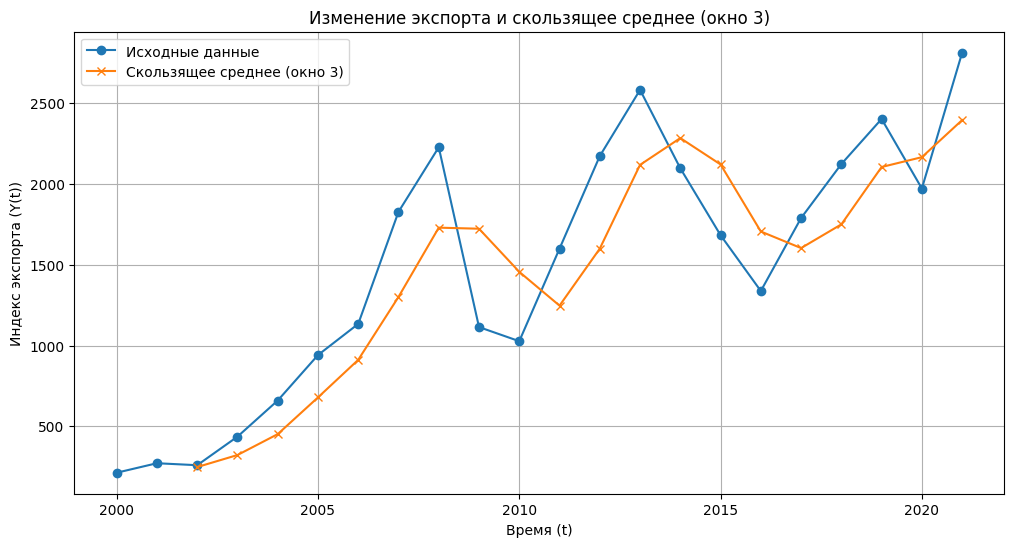

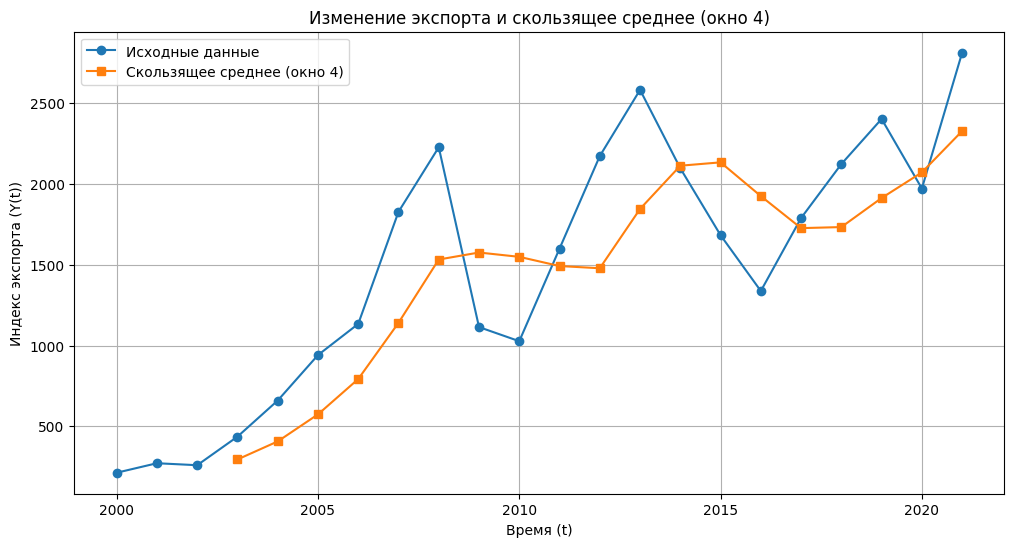

(3             NaN
 7             NaN
 11     248.100000
 15     322.533333
 19     451.933333
 23     679.266667
 27     912.000000
 31    1301.466667
 35    1730.400000
 39    1723.833333
 43    1456.833333
 47    1247.583333
 51    1600.550000
 55    2119.283333
 59    2285.133333
 63    2121.766667
 67    1706.633333
 71    1603.966667
 75    1750.833333
 79    2105.933333
 83    2166.800000
 87    2396.600000
 Name: SMA_3, dtype: float64,
 3           NaN
 7           NaN
 11          NaN
 15     295.1500
 19     406.9000
 23     574.3250
 27     793.0750
 31    1141.1000
 35    1533.1750
 39    1576.5000
 43    1549.7250
 47    1492.7625
 51    1479.1125
 55    1846.3125
 59    2113.9875
 63    2134.7500
 67    1925.8750
 71    1727.5000
 75    1734.0250
 79    1914.0000
 83    2072.6250
 87    2328.5000
 Name: SMA_4, dtype: float64)

In [11]:
import matplotlib.pyplot as plt


# Сдесь строим с помощью функции rolling значения скользящей средней
data_frame['SMA_3'] = data_frame['Y(t)'].rolling(window=3).mean()
data_frame['SMA_4'] = data_frame['Y(t)'].rolling(window=4).mean()

# строим два графика на основании полученных данных
plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['SMA_3'], label='Скользящее среднее (окно 3)', marker='x')
plt.title('Изменение экспорта и скользящее среднее (окно 3)')
plt.xlabel('Время (t)')
plt.ylabel('Индекс экспорта (Y(t))')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['SMA_4'], label='Скользящее среднее (окно 4)', marker='s')
plt.title('Изменение экспорта и скользящее среднее (окно 4)')
plt.xlabel('Время (t)')
plt.ylabel('Индекс экспорта (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

data_frame['SMA_3'],data_frame['SMA_4']

Если сравнить фактические объемы продаж с прогнозами, видно, что ни один
из методов прогнозирования не является достаточно точным.


Мерой сравнения является среднее абсолютных отклонений. Для
скользящего среднего за три месяца значение среднего абсолютных
отклонений равно 5,40; для скользящего среднего за четыре месяца значение
среднего абсолютных отклонений равно 5,55. Это значит, что использование
большого количества статистических данных скорее ухудшает, чем улучшает
точность прогноза методом скользящего среднего.


Значение прогноза, полученное методом простого скользящего среднего,
всегда меньше фактического значения, если исходные данные монотонно
возрастают, и больше фактического значения, если исходные данные
монотонно убывают.


Поэтому, если данные монотонно возрастают или убывают, то с помощью
простого скользящего среднего нельзя получить точных прогнозов. Этот
метод лучше всего подходит для данных с небольшими случайными
отклонениями от некоторого постоянного или медленно меняющегося
значения.

## Метод взвешенной скользящей средней

Идея, что более поздние данные важнее более старых, лежит в основе
метода взвешенной скользящей средней по n узлам.
Например, при n=3 взвешенное среднее вычисляется по формуле

image.png


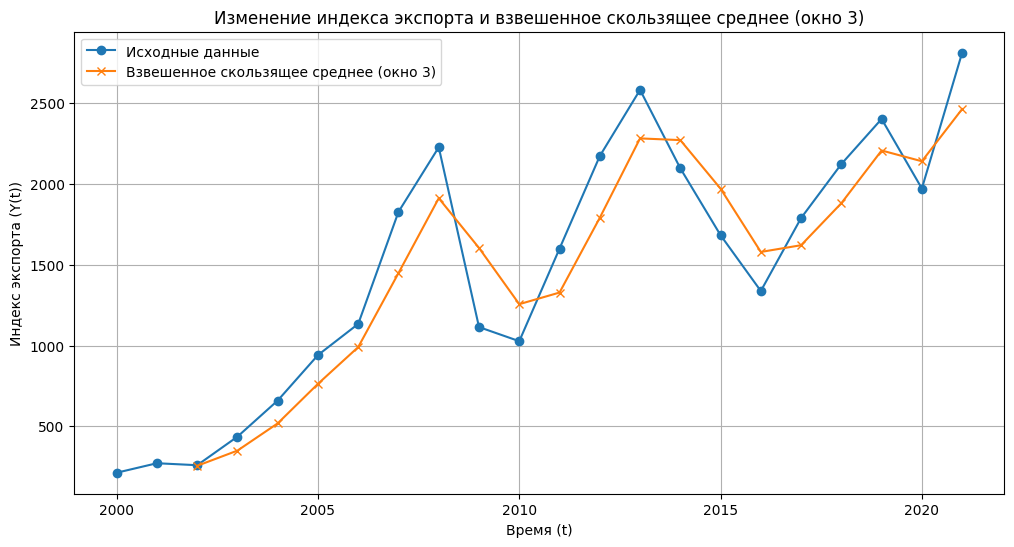

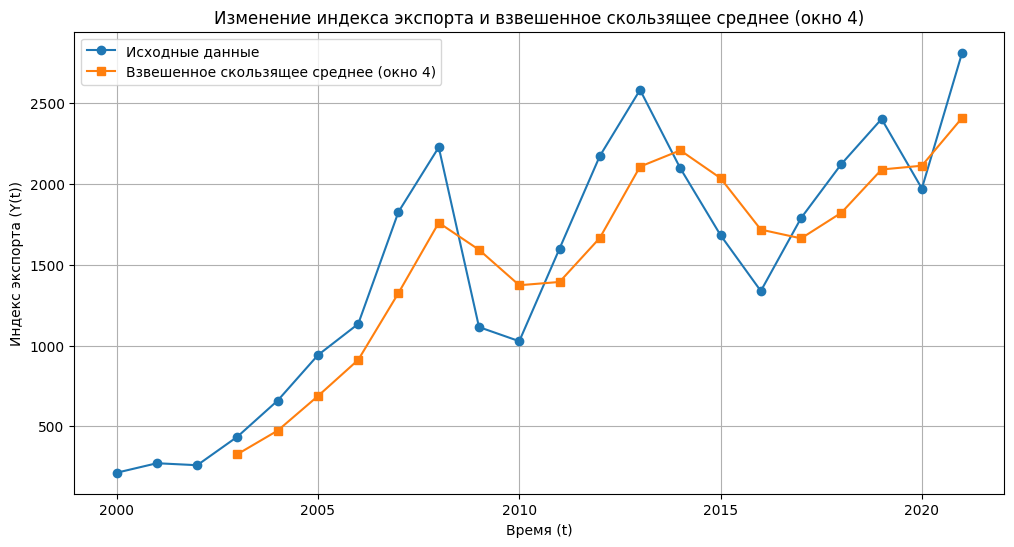

(3             NaN
 7             NaN
 11     255.850000
 15     349.950000
 19     518.683333
 23     763.466667
 27     991.083333
 31    1449.283333
 35    1912.700000
 39    1604.900000
 43    1256.683333
 47    1328.541667
 51    1791.600000
 55    2283.125000
 59    2272.533333
 63    1971.766667
 67    1579.983333
 71    1621.716667
 75    1881.833333
 79    2208.166667
 83    2141.550000
 87    2464.950000
 Name: WMA_3, dtype: float64,
 3          NaN
 7          NaN
 11         NaN
 15     328.030
 19     473.970
 23     687.810
 27     911.880
 31    1326.010
 35    1760.890
 39    1593.540
 43    1373.900
 47    1394.230
 51    1666.605
 55    2108.400
 59    2209.115
 63    2036.960
 67    1718.340
 71    1664.030
 75    1822.710
 79    2090.500
 83    2113.980
 87    2410.370
 Name: WMA_4, dtype: float64)

In [12]:
import numpy as np

# Функция рассчета весов в зависимости от количества окон
def weighted_moving_average(data, window_size):
    """
    Calculate the Weighted Moving Average for a given window size.
    """
    weights = np.arange(1, window_size + 1)
    return data.rolling(window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Здесь сроятся значения взвешенной скользящей для 3 и 4 окон
data_frame['WMA_3'] = weighted_moving_average(data_frame['Y(t)'], 3)
data_frame['WMA_4'] = weighted_moving_average(data_frame['Y(t)'], 4)


# Построим графики на основе полученных данных
plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['WMA_3'], label='Взвешенное скользящее среднее (окно 3)', marker='x')
plt.title('Изменение индекса экспорта и взвешенное скользящее среднее (окно 3)')
plt.xlabel('Время (t)')
plt.ylabel('Индекс экспорта (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

# Graph for WMA with window size 4
plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['WMA_4'], label='Взвешенное скользящее среднее (окно 4)', marker='s')
plt.title('Изменение индекса экспорта и взвешенное скользящее среднее (окно 4)')
plt.xlabel('Время (t)')
plt.ylabel('Индекс экспорта (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

data_frame['WMA_3'], data_frame['WMA_4']

Полученные результаты показывают, что оптимальное распределение весов
таково, что вес сосредоточен на самом последнем наблюдении. При этом
значение среднего абсолютных отклонений равно 4,67. Этот результат
подтверждает предположение о том, что более поздние наблюдения должны
иметь больший вес.


## Метод экспоненциального сглаживания

Рассмотренные методы простой и взвешенной скользящей средней не дают
возможности сгладить первые и последние p наблюдений временного ряда.
Отсутствие сглаженных первых наблюдений не так важно по сравнению с
последними наблюдениями, особенно если целью исследования является
прогнозирование развития процесса. Есть методы, позволяющие получить
сглаженные значения последних уровней так же, как и всех остальных. К их
числу относится метод экспоненциального сглаживания.

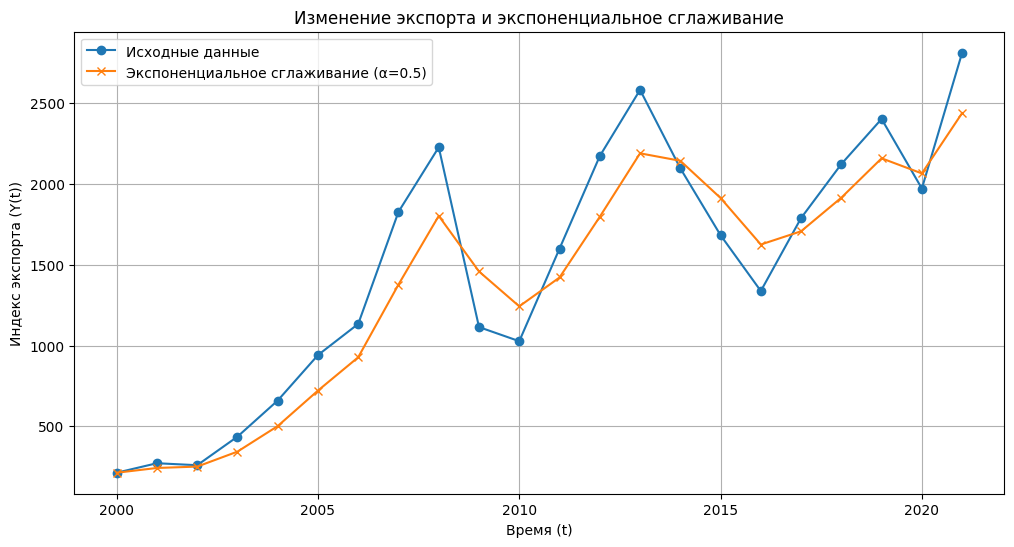

3      213.000000
7      242.400000
11     250.950000
15     343.625000
19     501.812500
23     721.656250
27     928.078125
31    1378.239063
35    1803.269531
39    1459.034766
43    1243.217383
47    1421.883691
51    1797.791846
55    2190.695923
59    2144.397961
63    1913.998981
67    1626.099490
71    1708.099745
75    1916.149873
79    2159.824936
83    2066.262468
87    2439.931234
Name: EMA, dtype: float64

In [13]:
# Вычисляем значения экс. сглаживания с помощью функции ewm
data_frame['EMA'] = data_frame['Y(t)'].ewm(alpha=0.5, adjust=False).mean()

# строим график
plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['EMA'], label='Экспоненциальное сглаживание (α=0.5)', marker='x')

plt.title('Изменение экспорта и экспоненциальное сглаживание')
plt.xlabel('Время (t)')
plt.ylabel('Индекс экспорта (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

data_frame['EMA']